<a href="https://colab.research.google.com/github/rakshithamahesh/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
from sklearn.model_selection import train_test_split
from google.colab import drive
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
from pandas.core.dtypes.cast import can_hold_element

cement_data =df=pd.read_csv('gdrive/My Drive/glass.csv')


print("Info:-")
cement_data.info()

Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [31]:
print("Describe:-")
cement_data.describe(include='all')

Describe:-


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


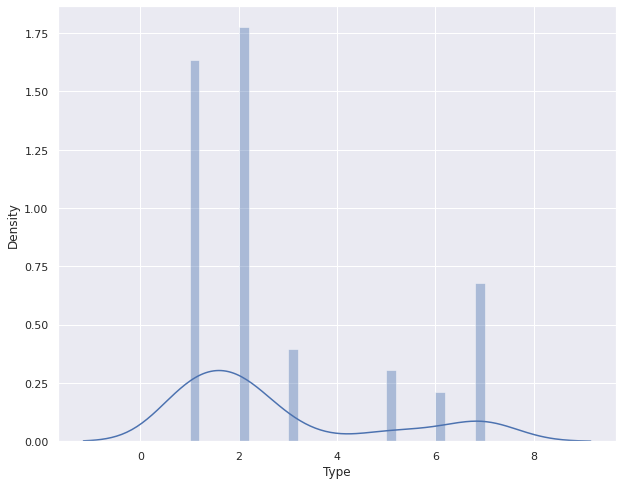

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(cement_data['Type'], bins=30)
plt.show()

In [33]:
#check for null values
cement_data.isnull().sum()
#check for duplicate values and remving them
print(cement_data.shape)
cement_data = cement_data.drop_duplicates()
cement_data= cement_data.dropna()
print(cement_data.shape)


(214, 10)
(213, 10)


In [34]:
x = cement_data[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba","Fe"]]

y = cement_data["Type"]
X = StandardScaler().fit_transform(x)
encoder = LabelEncoder()
encoder_y = encoder.fit(y)
transform_y = encoder.transform(y)
Y = to_categorical(transform_y)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    test_size = 0.2)

In [22]:
def model(activation,learning_rate,max_iter,x_train, x_test, y_train, y_test):
  model = Sequential()
  model.add(Dense(16,input_dim=9,activation="sigmoid"))
  model.add(Dense(12, activation="sigmoid"))
  model.add(Dense(8, activation="sigmoid"))
  model.add(Dense(6, activation="sigmoid"))

  optimz = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error', optimizer=optimz, metrics=['accuracy'])

  history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=1)


  pred_train = model.predict(np.array(x_train))
  pred_test = model.predict(np.array(x_test))
  MSE_train = mean_squared_error(y_train,pred_train)
  MSE_test = mean_squared_error(y_test,pred_test)
  R2_train = r2_score(y_train,pred_train)
  R2_test = r2_score(y_test,pred_test)
  
  print("Activation:",activation)
  print("Learning rate:",learning_rate)
  print("maximum iteration:",max_iter)

  print("-----------Start of one set------------")
  # print("Activation:", i, "\n Learning Rate:", j, "\n Epochs:", k, "\n Number of Layers:", layer)
  print("MSE of the Train Data:", MSE_train, "\n MSE of the Test Data:", MSE_test)
  print("R2 of the Train Data:", R2_train, "\n R2 of the Test Data:", R2_test)
  print("----------End of this Set-------------- \n")

  print(history.history.keys())
# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [24]:
def modelwithtwolayers(activation,learning_rate,max_iter,x_train, x_test, y_train, y_test):
  model = Sequential()
  model.add(Dense(16,input_dim=9,activation="sigmoid"))
  model.add(Dense(12, activation="sigmoid"))
  model.add(Dense(6, activation="sigmoid"))

  optimz = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error', optimizer=optimz, metrics=['accuracy'])

  history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=1)


  pred_train = model.predict(np.array(x_train))
  pred_test = model.predict(np.array(x_test))
  MSE_train = mean_squared_error(y_train,pred_train)
  MSE_test = mean_squared_error(y_test,pred_test)
  R2_train = r2_score(y_train,pred_train)
  R2_test = r2_score(y_test,pred_test)
  
  print("Activation:",activation)
  print("Learning rate:",learning_rate)
  print("maximum iteration:",max_iter)

  print("-----------Start of one set------------")
  # print("Activation:", i, "\n Learning Rate:", j, "\n Epochs:", k, "\n Number of Layers:", layer)
  print("MSE of the Train Data:", MSE_train, "\n MSE of the Test Data:", MSE_test)
  print("R2 of the Train Data:", R2_train, "\n R2 of the Test Data:", R2_test)
  print("----------End of this Set-------------- \n")

  print(history.history.keys())
# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
# so far loss is very less for sigmoid function # 0.01 learning rate and epoch=100

        
activations = ['relu', 'tanh', 'sigmoid']
learning_rate = [0.01, 0.1]
max_iterations = [100, 200] # also known as epochs

for i in activations:
    for j in learning_rate:
        for k in max_iterations:
                    
            model(i,j,k,x_train, x_test, y_train, y_test)



Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.2124 - accuracy: 0.3353 - val_loss: 0.1823 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1553 - accuracy: 0.3353 - val_loss: 0.1489 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1330 - accuracy: 0.3353 - val_loss: 0.1366 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1247 - accuracy: 0.3412 - val_loss: 0.1323 - val_accuracy: 0.3023
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1210 - accuracy: 0.3882 - val_loss: 0.1309 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.1192 - accuracy: 0.3765 - val_loss: 0.1312 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1180 - accuracy: 0.3765 - val_loss: 0.1315 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=======

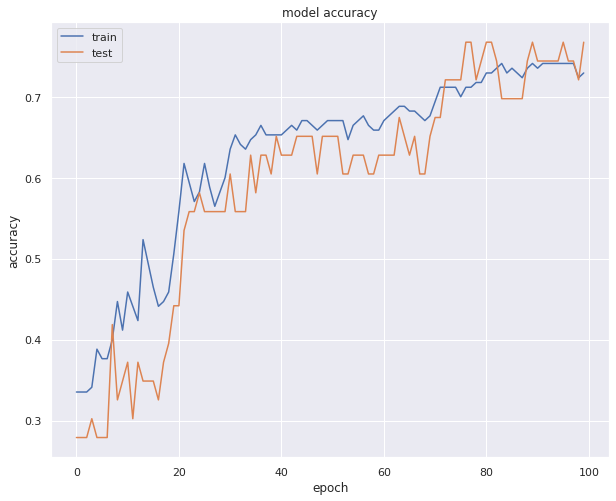

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2387 - accuracy: 0.0706 - val_loss: 0.1930 - val_accuracy: 0.0465
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.1353 - val_loss: 0.1580 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.3765 - val_loss: 0.1441 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1279 - accuracy: 0.3765 - val_loss: 0.1378 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.3765 - val_loss: 0.1350 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1212 - accuracy: 0.3765 - val_loss: 0.1339 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1201 - accuracy: 0.3706 - val_loss: 0.1338 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

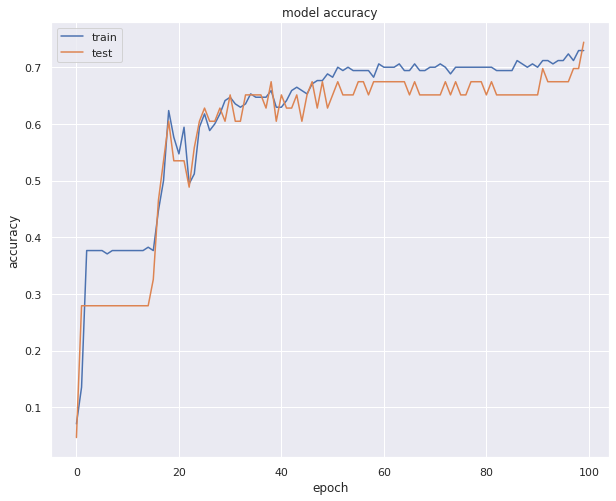

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2208 - accuracy: 0.3706 - val_loss: 0.1763 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.3353 - val_loss: 0.1445 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.3118 - val_loss: 0.1325 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1234 - accuracy: 0.3765 - val_loss: 0.1285 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.3765 - val_loss: 0.1268 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1178 - accuracy: 0.3765 - val_loss: 0.1256 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1165 - accuracy: 0.3765 - val_loss: 0.1249 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

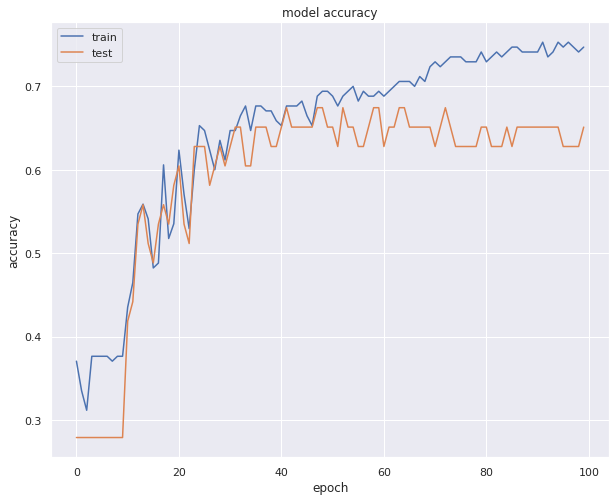

Epoch 1/100
6/6 [==============================] - 0s 25ms/step - loss: 0.1780 - accuracy: 0.3353 - val_loss: 0.1538 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1394 - accuracy: 0.3353 - val_loss: 0.1356 - val_accuracy: 0.3023
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.4353 - val_loss: 0.1308 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1212 - accuracy: 0.3765 - val_loss: 0.1311 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1187 - accuracy: 0.3765 - val_loss: 0.1303 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.3765 - val_loss: 0.1291 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.3706 - val_loss: 0.1279 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

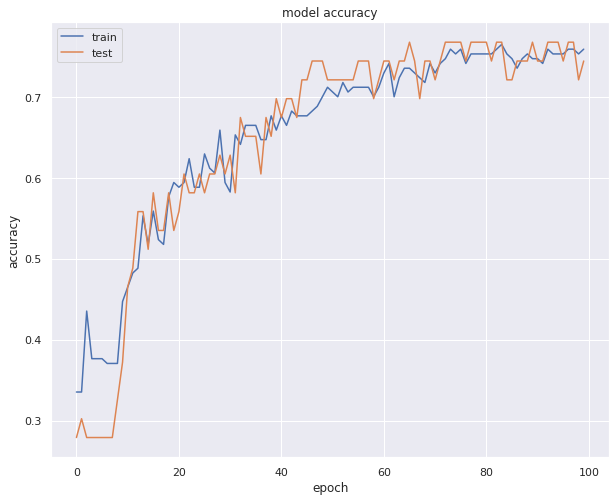

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2051 - accuracy: 0.3765 - val_loss: 0.1807 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.3765 - val_loss: 0.1499 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 0.3765 - val_loss: 0.1375 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.3765 - val_loss: 0.1335 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1203 - accuracy: 0.3824 - val_loss: 0.1325 - val_accuracy: 0.3256
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1193 - accuracy: 0.3412 - val_loss: 0.1326 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.3471 - val_loss: 0.1319 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

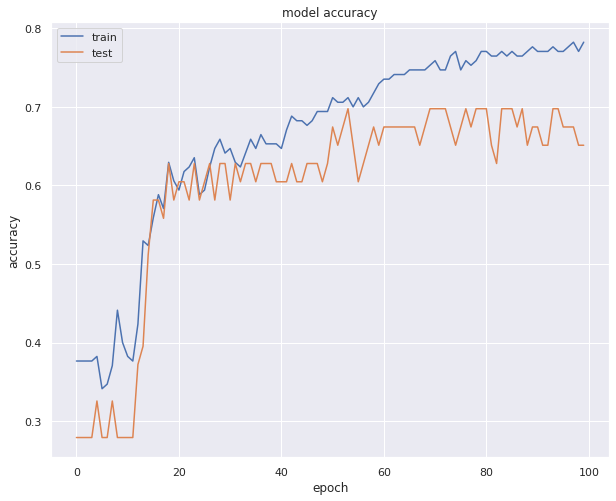

Epoch 1/100
6/6 [==============================] - 1s 80ms/step - loss: 0.2512 - accuracy: 0.3765 - val_loss: 0.2172 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1883 - accuracy: 0.3765 - val_loss: 0.1735 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1526 - accuracy: 0.3765 - val_loss: 0.1503 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1335 - accuracy: 0.3765 - val_loss: 0.1390 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1248 - accuracy: 0.3765 - val_loss: 0.1343 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1207 - accuracy: 0.3706 - val_loss: 0.1325 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.3882 - val_loss: 0.1311 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

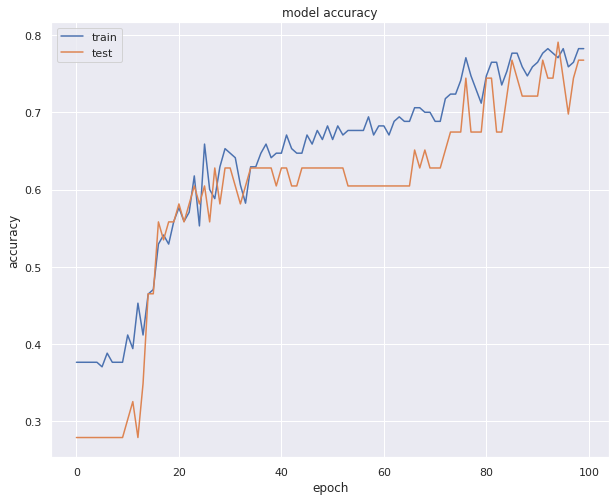

Epoch 1/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2009 - accuracy: 0.1118 - val_loss: 0.1610 - val_accuracy: 0.2326
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1500 - accuracy: 0.1235 - val_loss: 0.1344 - val_accuracy: 0.4884
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1281 - accuracy: 0.4118 - val_loss: 0.1281 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1215 - accuracy: 0.3765 - val_loss: 0.1277 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.3765 - val_loss: 0.1281 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1174 - accuracy: 0.3765 - val_loss: 0.1285 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1164 - accuracy: 0.3765 - val_loss: 0.1266 - val_accuracy: 0.3023
Epoch 8/100
6/6 [========

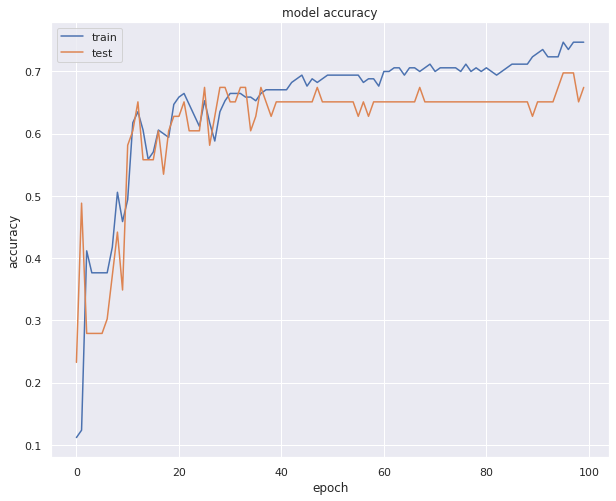

Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.1885 - accuracy: 0.3882 - val_loss: 0.1700 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1432 - accuracy: 0.3765 - val_loss: 0.1441 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1266 - accuracy: 0.3765 - val_loss: 0.1353 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1222 - accuracy: 0.3765 - val_loss: 0.1327 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.3765 - val_loss: 0.1316 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1190 - accuracy: 0.3824 - val_loss: 0.1308 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1179 - accuracy: 0.3941 - val_loss: 0.1304 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

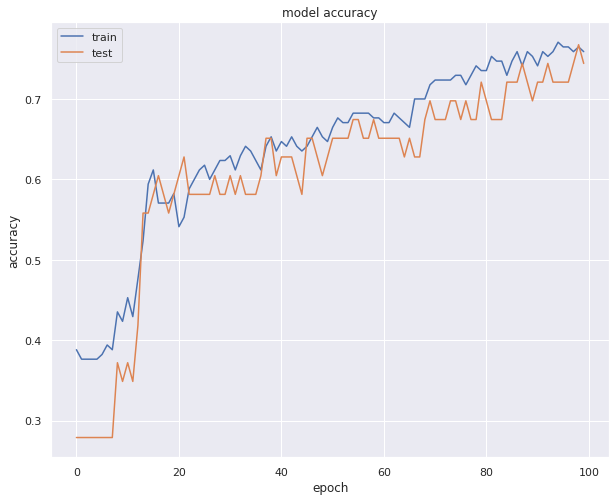

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2836 - accuracy: 0.0471 - val_loss: 0.2174 - val_accuracy: 0.1163
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.0471 - val_loss: 0.1658 - val_accuracy: 0.1163
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1613 - accuracy: 0.0471 - val_loss: 0.1432 - val_accuracy: 0.0698
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1399 - accuracy: 0.2765 - val_loss: 0.1335 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1285 - accuracy: 0.3765 - val_loss: 0.1304 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1225 - accuracy: 0.3765 - val_loss: 0.1295 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1199 - accuracy: 0.3765 - val_loss: 0.1299 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

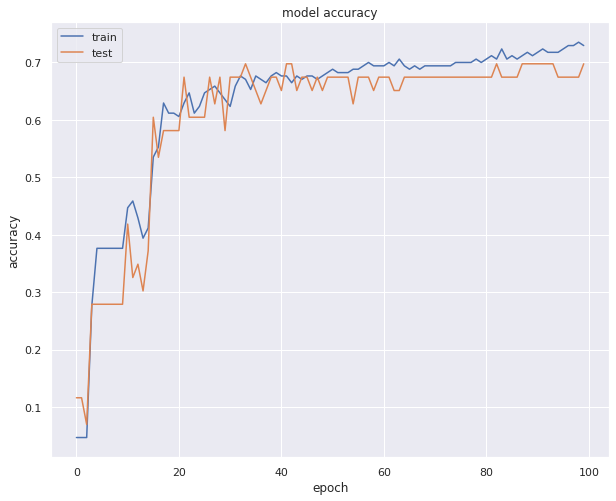

Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2806 - accuracy: 0.3176 - val_loss: 0.2219 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1945 - accuracy: 0.3353 - val_loss: 0.1647 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.3353 - val_loss: 0.1403 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1291 - accuracy: 0.4059 - val_loss: 0.1331 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.3765 - val_loss: 0.1317 - val_accuracy: 0.2791
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1199 - accuracy: 0.3765 - val_loss: 0.1310 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1187 - accuracy: 0.3765 - val_loss: 0.1308 - val_accuracy: 0.2791
Epoch 8/100
6/6 [=========

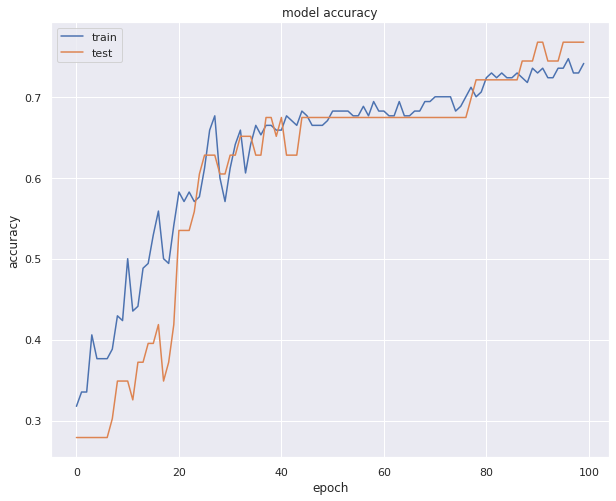

Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2005 - accuracy: 0.1059 - val_loss: 0.1660 - val_accuracy: 0.2326
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1530 - accuracy: 0.1588 - val_loss: 0.1385 - val_accuracy: 0.4884
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1307 - accuracy: 0.4118 - val_loss: 0.1298 - val_accuracy: 0.3023
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.1218 - accuracy: 0.4000 - val_loss: 0.1280 - val_accuracy: 0.3023
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1184 - accuracy: 0.3882 - val_loss: 0.1286 - val_accuracy: 0.3023
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1167 - accuracy: 0.4471 - val_loss: 0.1293 - val_accuracy: 0.4186
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1161 - accuracy: 0.5176 - val_loss: 0.1290 - val_accuracy: 0.3488
Epoch 8/100
6/6 [=======

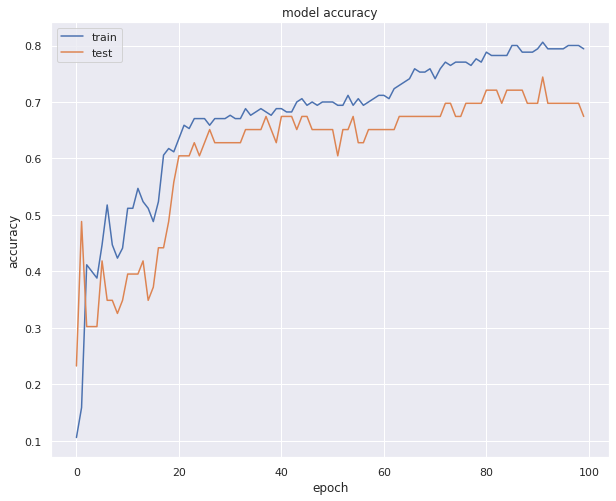

Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2425 - accuracy: 0.1706 - val_loss: 0.2015 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1841 - accuracy: 0.3706 - val_loss: 0.1635 - val_accuracy: 0.2791
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1508 - accuracy: 0.3765 - val_loss: 0.1430 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1322 - accuracy: 0.3882 - val_loss: 0.1338 - val_accuracy: 0.3023
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1240 - accuracy: 0.4059 - val_loss: 0.1316 - val_accuracy: 0.3488
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.4000 - val_loss: 0.1318 - val_accuracy: 0.3953
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1183 - accuracy: 0.4529 - val_loss: 0.1319 - val_accuracy: 0.3488
Epoch 8/100
6/6 [=========

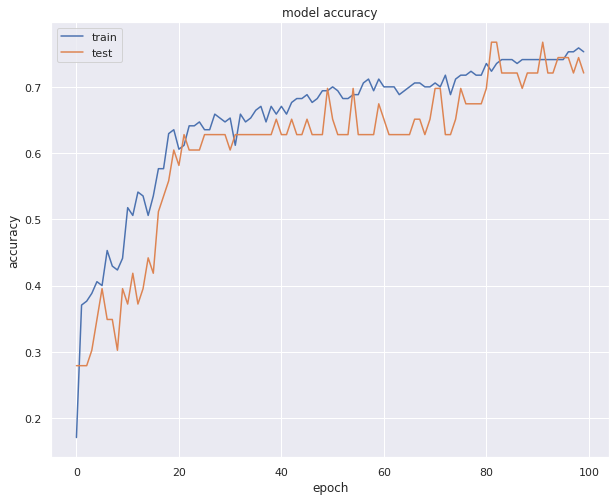

In [25]:
activations = ['relu', 'tanh', 'sigmoid']
learning_rate = [0.01, 0.1]
max_iterations = [100, 200] # also known as epochs
for i in activations:
    for j in learning_rate:
        for k in max_iterations:
                    
            modelwithtwolayers(i,j,k,x_train, x_test, y_train, y_test)